<a href="https://colab.research.google.com/github/Innanov/Xanadu-Codebook-Solutions/blob/main/Xanadu_SHOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Xanadu Codebook Solutions (Shor's algo)

## S.1 Modular arithmetic

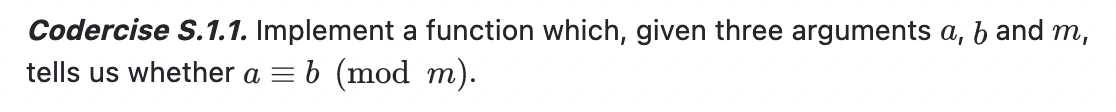

In [ ]:
def is_equivalent(a, b, m):
    """Return a boolean indicating whether the equivalence is satisfied.

    Args:
        a (int): First number to check the equivalence.
        b (int): Second number to check the equivalence.
        m (int): Modulus of the equivalence.
    
    Returns:
        bool: True if a = b (m), False otherwise.
    """
    
    ##################
    # YOUR CODE HERE #
    ##################
    return np.mod(a-b, m) == 0
  
  

    
print(f"13 = 8 (3) is {is_equivalent(13, 8, 3)}")
print(f"13 = 7 (6) is {is_equivalent(13, 7, 6)}")


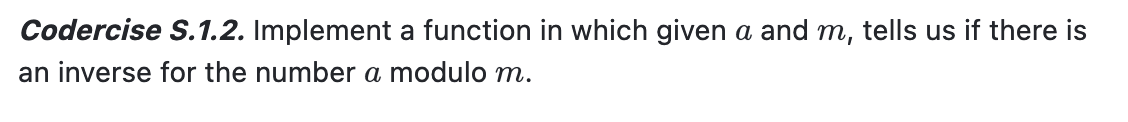



In [ ]:
def has_inverse(a, m):
    """Returns a boolean indicating whether a number has an inverse modulo m.
    
    Args:
        a (int): Number to find the inverse modulus m.
        m (int): Modulus of the equivalence.

    Returns:
        bool: True if c exists (ac = 1 (m)), False otherwise    
    """
    
    ##################
    # YOUR CODE HERE #
    ##################
    ref = np.mod(1, m)
    for i in range(1, m+1):
       if (np.mod(a*i, m) == ref):
           return True
    return False

    
print("(5,15)", has_inverse(5,15))
print("(7,15)", has_inverse(7,15))


## S.2 Classical factorization

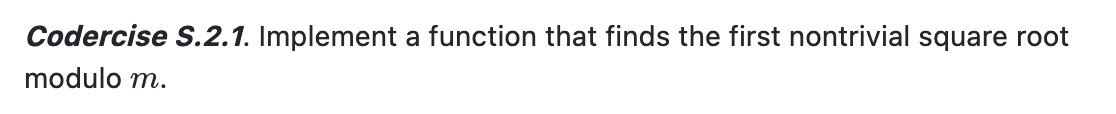

In [ ]:
def nontrivial_square_root(m):
    """Return the first nontrivial square root modulo m.
    
    Args:
        m (int): modulus for which want to find the nontrivial square root

    Returns:
        int: the first nontrivial square root of m
    """
    
    ##################
    # YOUR CODE HERE #
    ##################
    ref = np.mod(1, m)
    for i in range(2, m+1):
        if np.mod(i**2, m) == ref:
            return i
        


        
print(nontrivial_square_root(391))


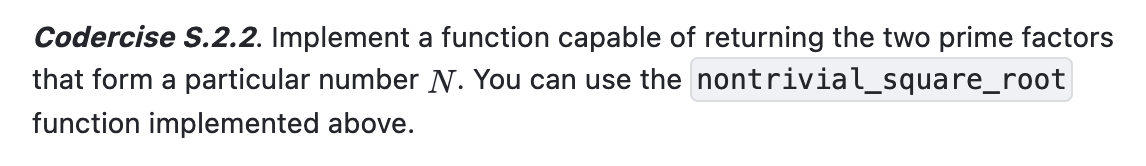

In [ ]:
 
def factorization(N):
    
    """Return the factors of N.
    
    Args:
        N (int): number we want to factor.

    Returns:
        array[int]: [p,q] factors of N.
    """
    ##################
    # YOUR CODE HERE #
    ##################
    val = nontrivial_square_root(N)
    return [np.gcd(val-1, N), np.gcd(val+1, N)]



N = 391
p, q = factorization(N)
print(f"{N} = {p} x {q}")


## S.3 Period finding

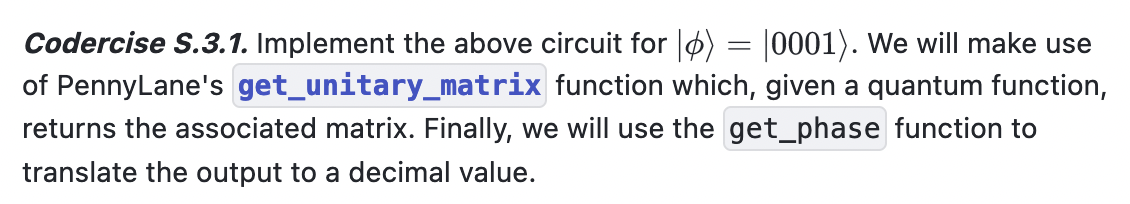

In [ ]:
def U():
    qml.SWAP(wires=[2,3])
    qml.SWAP(wires=[1,2])
    qml.SWAP(wires=[0,1])
    for i in range(4):
        qml.PauliX(wires=i)

matrix = get_unitary_matrix(U, wire_order=range(4))()

n_target_wires = 4
target_wires = range(n_target_wires)
n_estimation_wires = 3
estimation_wires = range(4, 4 + n_estimation_wires)


dev = qml.device("default.qubit", shots=1, wires=n_target_wires+n_estimation_wires)

@qml.qnode(dev)
def circuit(matrix):
    """Return a sample after taking a shot at the estimation wires.
    
    Args:
        matrix (array[complex]): matrix representation of U.

    Returns:
        array[float]: a sample after taking a shot at the estimation wires.
    """
    
    ##################
    # YOUR CODE HERE #
    ##################
    
    # CREATE THE INITIAL STATE |0001> ON TARGET WIRES
    qml.PauliX(wires=3)
   
    # USE THE SUBROUTINE QUANTUM PHASE ESTIMATION
    qml.templates.QuantumPhaseEstimation(matrix, target_wires=target_wires,
        estimation_wires=estimation_wires)
    
    return qml.sample(wires=estimation_wires)

def get_phase(matrix):
    binary = "".join([str(b) for b in circuit(matrix)])
    return int(binary, 2) / 2 ** n_estimation_wires

for i in range(5):
    print(circuit(matrix))
    print(f"shot {i+1}, phase:",get_phase(matrix))


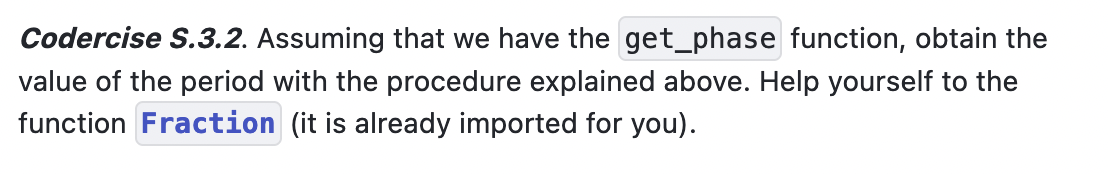

In [ ]:
def U():
    qml.SWAP(wires=[2,3])
    qml.SWAP(wires=[1,2])
    qml.SWAP(wires=[0,1])
    for i in range(4):
        qml.PauliX(wires=i)

matrix = get_unitary_matrix(U, wire_order=range(4))()

target_wires = range(4)
n_estimation_wires = 3
estimation_wires = range(4, 4 + n_estimation_wires)

def get_period(matrix):
    """Return the period of the state using the already-defined 
    get_phase function.
    
    Args:
        matrix (array[complex]): matrix associated with the operator U
        
    Returns:
        int: Obtained period of the state.
    """
    
    shots = 10
    
    ##################
    # YOUR CODE HERE #
    ##################
    max_val = 0
    for j in range(shots):
        x = get_phase(matrix)
        val = Fraction(x).limit_denominator(2 ** n_estimation_wires).denominator
        if val > max_val:
            max_val = val
    return max_val

    

print(get_period(matrix))


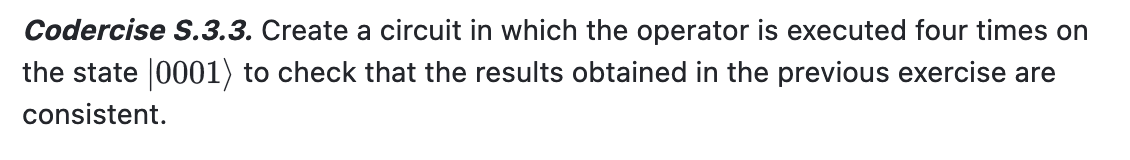

In [ ]:
def U():
    qml.SWAP(wires=[2,3])
    qml.SWAP(wires=[1,2])
    qml.SWAP(wires=[0,1])
    for i in range(4):
        qml.PauliX(wires=i)

dev = qml.device("default.qubit", wires=4)

@qml.qnode(dev)
def circuit():
    """Apply U four times to |0001> to verify this is the period.
    
    Returns:
        array[float]: probabilities of each basis state. 
    """
    
    ##################
    # YOUR CODE HERE #
    ##################
    qml.PauliX(wires=3)
    for i in range(4):
        U()
    
    return qml.probs(wires=range(4))


print(circuit())


## S.4 Shor's algorithm

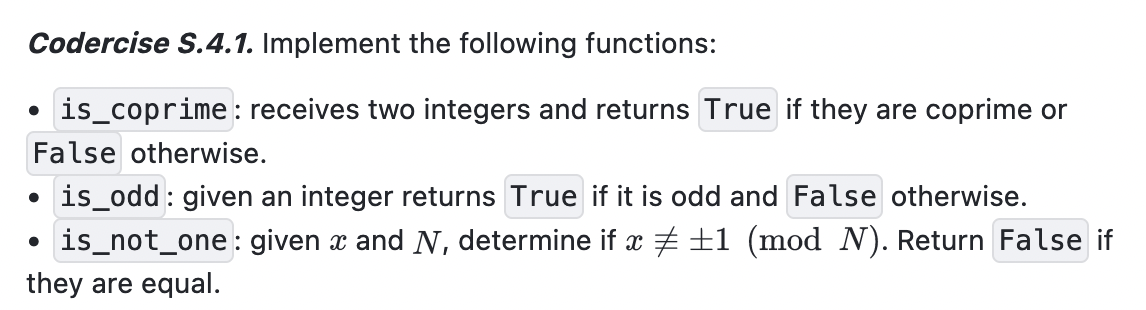

In [ ]:
def is_coprime(a, N):  
    """Determine if two numbers are coprime.
        
    Args:
        a (int): First number to check if is coprime with the other.
        N (int): Second number to check if is coprime with the other.
        
    Returns:
        bool: True if they are coprime numbers, False otherwise.
    """
    
    ##################
    # YOUR CODE HERE #
    ##################
    return np.gcd(a, N) == 1




def is_odd(r):
    """Determine if a number is odd.   
    
    Args:
        r (int): Integer to check if is an odd number.
        
    Returns:
        bool: True if it is odd, False otherwise.
    """
    
    ##################
    # YOUR CODE HERE #
    ##################
    return np.mod(r, 2) == 1
    




def is_not_one(x, N):
    """Determine if x is not +- 1 modulo N.
    
    Args:
        N (int): Modulus of the equivalence.
        x (int): Integer to check if it is different from +-1 modulo N.
        
    Returns:
        bool: True if it is different, False otherwise.
    """
    
    ##################
    # YOUR CODE HERE #
    ##################
    if np.mod(x+1, N) == 0:
        return False
    if np.mod(x-1, N) == 0:
        return False
    return True


print("3 and 12 are coprime numbers: ", is_coprime(3,12))
print("5 is odd: ", is_odd(5))
print("4 is not one mod 5: ",is_not_one(4,5))



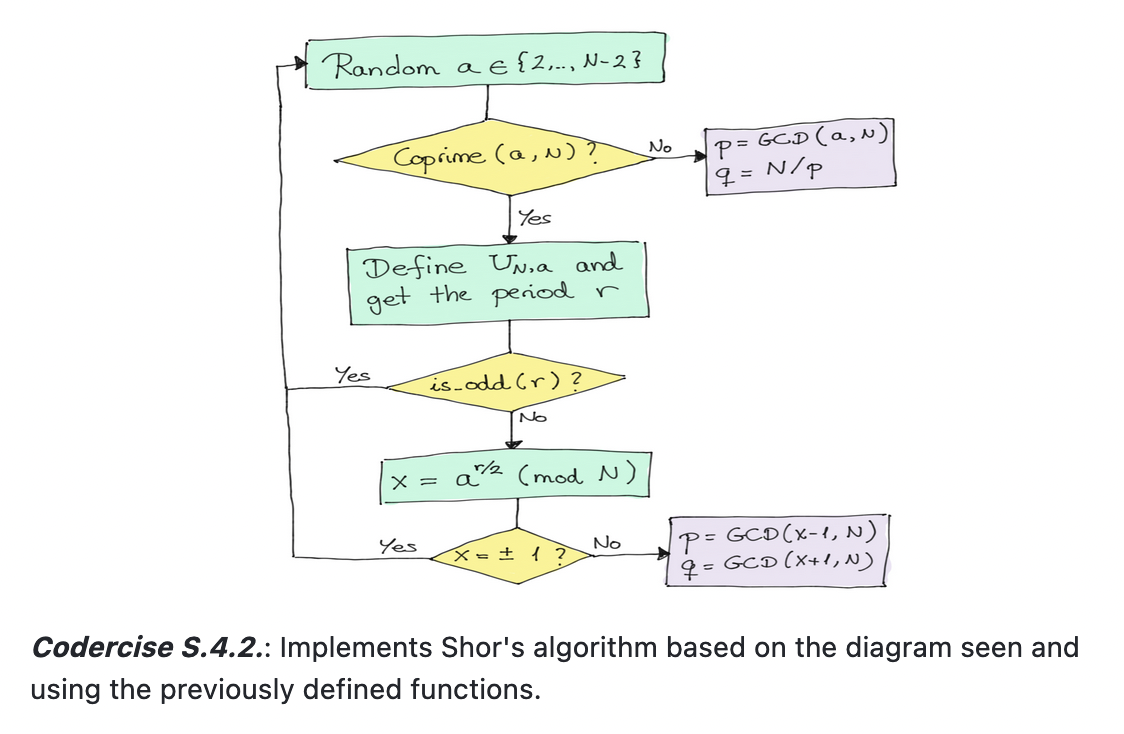

In [ ]:

def shor(N):
    """Return the factorization of a given integer.
   
    Args:
       N (int): integer we want to factorize.
    
    Returns:
        array[int]: [p,q], the prime factors of N.
    """
        
    ##################
    # YOUR CODE HERE #
    ##################
    for a in range(2, N-1):
        if not is_coprime(a, N):
            p = np.gcd(a, N)
            return [p, N/p]
        else:
            matrix = get_matrix_a_mod_N(a, N)
            r = get_period(matrix, N)
            if not is_odd(r):
                x = int(a**(r/2))
                if is_not_one(x, N):
                    return [np.gcd(x-1, N), np.gcd(x+1, N)]
    

        

print(shor(21))


## S.5 The RSA system

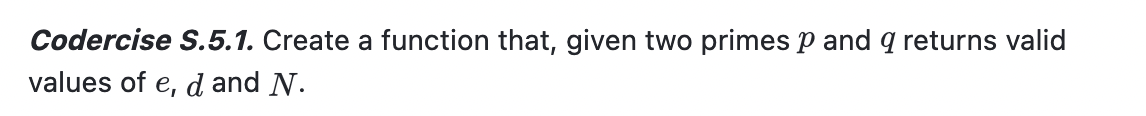

In [ ]:
def create_keys(p, q):
    """Returns the characteristic e, d and N values of RSA
    
    Args:
        p (int): First prime number of the algorithm.
        q (int): Second prime number of the algorithm.
        
    Returns:
        (int, int, int): a tuple consisting of the 'e' value of the RSA codification. 'd' value of the RSA codification.
            and 'N', the product of p and q.
    """
    
    ##################
    # YOUR CODE HERE #
    ##################
    N = p*q
    theta = (p-1)*(q-1)
    while(True):
        epsilon = np.random.randint(2,N)
        if np.gcd(theta, epsilon) == 1:
            break
    return (epsilon, pow(epsilon, -1, theta), N)


print(create_keys(3,53))


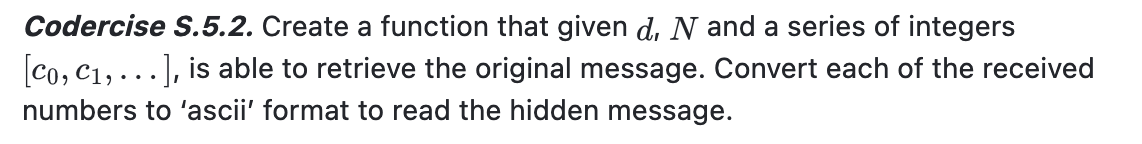

In [ ]:
def decode(d,N, code):
    """Decode an encrypted message
    
    Args:
        d (int): Value of the RSA codification.
        N (int): Product of p and q.
        code list[int]: List of values to be decoded.
        
    Returns:
        string: Decoded message. (One character per list item)
    """
    
    message = ""
    
    ##################
    # YOUR CODE HERE #
    ##################
    for chunk in code:
        val = pow(chunk, d, N)
        message += chr(val)

        
    return message

code =  [129827,
         294117,
         126201,
         157316,
         270984,
         126201,
         157316,
         270984,
         209269,
         163084,
         270984,
         157316,
         95353,
         289896,
         49377,
         95353,
         48004,
         270984,
         209269,
         95353,
         157316,
         157316,
         210673,
         267093,
         95353]

N = 378221
d = 150797


print(decode(d, N, code))
